In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [367]:
# Importing data set

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [368]:
# Identify the missing value

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [369]:
# Data handling or cleaning

In [370]:
# Kurtosis

In [11]:
data=pd.DataFrame(data)
x = data.kurtosis()
print(x)

age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64


In [371]:
# Outliers

In [13]:
from collections import Counter
def detect_outliers(data,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
Outliers_to_drop = detect_outliers(data,13,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
              'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
              'ca', 'thal', 'target'])

data.loc[Outliers_to_drop]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [372]:
#  Data visualization

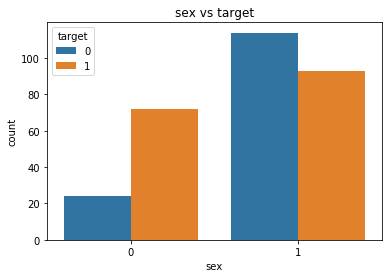

In [17]:
sns.countplot(x=data["sex"],hue=data["target"])
plt.title("sex vs target")
plt.show()

In [19]:
data.groupby(["sex"])["target"].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

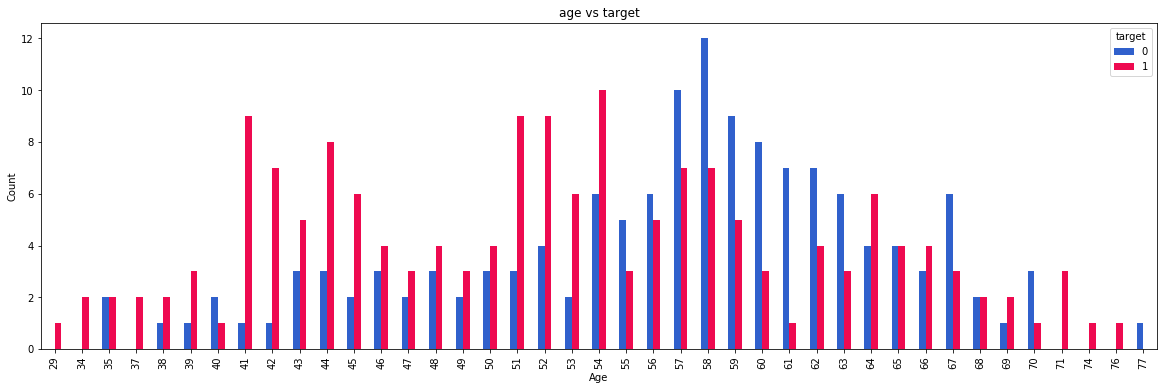

In [18]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6), color=['#3060cc','#ee0a50'])
#plt.figure(figsize=(20,6))
#sns.barplot(x=heart_data["age"],hue=heart_data["target"])
plt.title("age vs target")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [21]:
data.groupby(["age"])["target"].value_counts().head()

age  target
29   1         1
34   1         2
35   0         2
     1         2
37   1         2
Name: target, dtype: int64

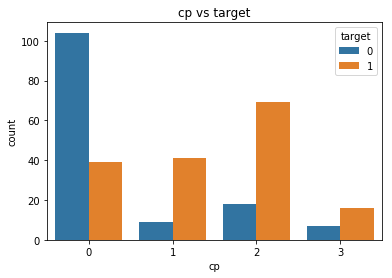

In [22]:
sns.countplot(x=data["cp"],hue=data["target"])
plt.title("cp vs target")
plt.show()

In [23]:
data.groupby(["cp"])["target"].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

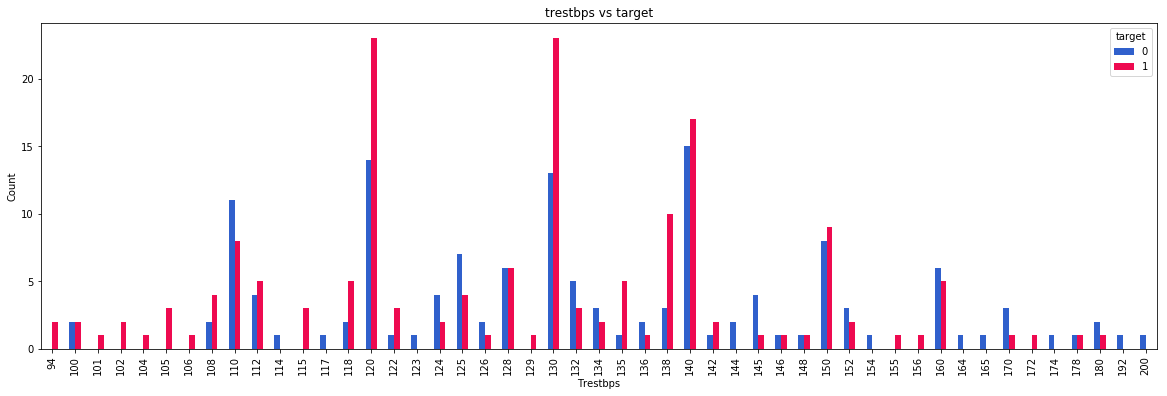

In [24]:
pd.crosstab(data.trestbps,data.target).plot(kind="bar",figsize=(20,6), color=['#3060cc','#ee0a50'])
#plt.figure(figsize=(20,6))
#sns.barplot(x=heart_data["age"],hue=heart_data["target"])
plt.title("trestbps vs target")
plt.xlabel('Trestbps')
plt.ylabel('Count')
plt.show()

In [26]:
data.groupby(["trestbps"])["target"].value_counts().head()

trestbps  target
94        1         2
100       0         2
          1         2
101       1         1
102       1         2
Name: target, dtype: int64

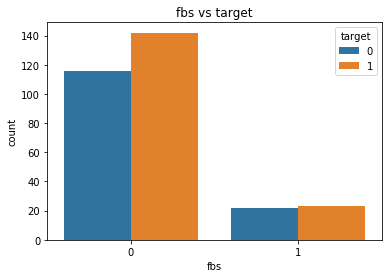

In [27]:
sns.countplot(x=data["fbs"],hue=data["target"])
plt.title("fbs vs target")
plt.show()

In [28]:
data.groupby(["fbs"])["target"].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

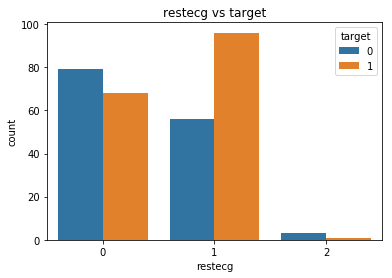

In [29]:
sns.countplot(x=data["restecg"],hue=data["target"])
plt.title("restecg vs target")
plt.show()

In [31]:
data.columns = ['age', 'Gender', 'chest_pain_type', 'rest_bps', 'chol', 'fbs',
              'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope',
              'num_major_vessels', 'thalassemia', 'target']

In [32]:
X = data.drop('target',axis=1)

In [33]:
X

,age,Gender,chest_pain_type,rest_bps,chol,fbs,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [34]:
Y = data['target']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=100)

In [36]:
X_train.shape

(212, 13)

In [37]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)  

lm_1 = sm.OLS(Y_train,X_train).fit()

In [38]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.84e-22
Time:                        15:10:27   Log-Likelihood:                -81.411
No. Observations:                 212   AIC:                             190.8
Df Residuals:                     198   BIC:                             237.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [39]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [40]:
vif_cal(input_data=data, dependent_col="target")

,Var,Vif
3,rest_bps,58.56
7,max_heart_rate,42.74
0,age,39.00
4,chol,26.27
12,thalassemia,17.17
10,st_slope,10.07
1,Gender,3.52
9,st_depression,3.06
2,chest_pain_type,2.41
6,rest_ecg,2.06


In [41]:
X_train = X_train.drop('age', 1)

In [42]:
lm_2 = sm.OLS(Y_train,X_train).fit()

In [43]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     15.67
Date:                Sun, 10 May 2020   Prob (F-statistic):           4.87e-23
Time:                        15:10:46   Log-Likelihood:                -81.497
No. Observations:                 212   AIC:                             189.0
Df Residuals:                     199   BIC:                             232.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
vif_cal(input_data=data.drop(["age"], axis=1), dependent_col="target")

,Var,Vif
2,rest_bps,42.94
6,max_heart_rate,42.56
3,chol,23.63
11,thalassemia,16.94
9,st_slope,10.02
0,Gender,3.52
8,st_depression,3.04
1,chest_pain_type,2.41
5,rest_ecg,2.05
7,exercise_induced_angina,2.02


In [45]:
X_train = X_train.drop('rest_bps', 1)

In [46]:
lm_3 = sm.OLS(Y_train,X_train).fit()

In [47]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     17.12
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.34e-23
Time:                        15:11:03   Log-Likelihood:                -81.677
No. Observations:                 212   AIC:                             187.4
Df Residuals:                     200   BIC:                             227.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [48]:
vif_cal(input_data=data.drop(["age","rest_bps"], axis=1), dependent_col="target")

,Var,Vif
5,max_heart_rate,32.38
2,chol,20.87
10,thalassemia,16.37
8,st_slope,9.96
0,Gender,3.52
7,st_depression,2.86
1,chest_pain_type,2.38
4,rest_ecg,2.05
6,exercise_induced_angina,1.97
9,num_major_vessels,1.74


In [49]:
X_train = X_train.drop('max_heart_rate', 1)

In [50]:
lm_4 = sm.OLS(Y_train,X_train).fit()

In [51]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     18.02
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.84e-23
Time:                        15:11:15   Log-Likelihood:                -84.158
No. Observations:                 212   AIC:                             190.3
Df Residuals:                     201   BIC:                             227.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [52]:
vif_cal(input_data=data.drop(["age","rest_bps","max_heart_rate"], axis=1), dependent_col="target")

,Var,Vif
2,chol,14.92
9,thalassemia,14.86
7,st_slope,7.98
0,Gender,3.40
6,st_depression,2.83
1,chest_pain_type,2.21
4,rest_ecg,2.01
5,exercise_induced_angina,1.95
8,num_major_vessels,1.71
3,fbs,1.23


In [53]:
X_train = X_train.drop('chol', 1)

In [54]:
lm_5 = sm.OLS(Y_train,X_train).fit()

In [55]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     19.85
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.15e-23
Time:                        15:11:27   Log-Likelihood:                -84.849
No. Observations:                 212   AIC:                             189.7
Df Residuals:                     202   BIC:                             223.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [56]:
vif_cal(input_data=data.drop(["age","rest_bps","max_heart_rate","chol"], axis=1), dependent_col="target")

,Var,Vif
8,thalassemia,10.48
6,st_slope,6.20
0,Gender,3.35
5,st_depression,2.63
1,chest_pain_type,2.15
3,rest_ecg,2.01
4,exercise_induced_angina,1.92
7,num_major_vessels,1.71
2,fbs,1.22


In [57]:
X_train = X_train.drop('fbs', 1)

In [58]:
lm_6 = sm.OLS(Y_train,X_train).fit()

In [59]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     22.29
Date:                Sun, 10 May 2020   Prob (F-statistic):           3.15e-24
Time:                        15:11:37   Log-Likelihood:                -85.170
No. Observations:                 212   AIC:                             188.3
Df Residuals:                     203   BIC:                             218.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [60]:
vif_cal(input_data=data.drop(["age","rest_bps","max_heart_rate","chol","fbs"], axis=1), dependent_col="target")

,Var,Vif
7,thalassemia,10.47
5,st_slope,6.20
0,Gender,3.34
4,st_depression,2.63
1,chest_pain_type,2.09
2,rest_ecg,2.00
3,exercise_induced_angina,1.91
6,num_major_vessels,1.66


In [61]:
X_train = X_train.drop('rest_ecg', 1)

In [62]:
lm_7 = sm.OLS(Y_train,X_train).fit()

In [63]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     25.32
Date:                Sun, 10 May 2020   Prob (F-statistic):           9.97e-25
Time:                        15:11:49   Log-Likelihood:                -85.719
No. Observations:                 212   AIC:                             187.4
Df Residuals:                     204   BIC:                             214.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [64]:
vif_cal(input_data=data.drop(["age","rest_bps","max_heart_rate","chol","fbs","rest_ecg"], axis=1), dependent_col="target")

,Var,Vif
6,thalassemia,10.23
4,st_slope,5.95
0,Gender,3.34
3,st_depression,2.61
1,chest_pain_type,2.08
2,exercise_induced_angina,1.91
5,num_major_vessels,1.66


In [65]:
X_train = X_train.drop('thalassemia', 1)

In [66]:
lm_6 = sm.OLS(Y_train,X_train).fit()

In [67]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     25.78
Date:                Sun, 10 May 2020   Prob (F-statistic):           9.71e-23
Time:                        15:12:02   Log-Likelihood:                -92.416
No. Observations:                 212   AIC:                             198.8
Df Residuals:                     205   BIC:                             222.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [68]:
vif_cal(input_data=data.drop(["age","rest_bps","max_heart_rate","chol","fbs","rest_ecg","thalassemia"], axis=1), dependent_col="target")

,Var,Vif
4,st_slope,3.19
0,Gender,3.03
1,chest_pain_type,2.03
3,st_depression,2.01
2,exercise_induced_angina,1.78
5,num_major_vessels,1.64


In [69]:
X_test_m6 = sm.add_constant(X_test)

In [70]:
X_test_m6 = X_test_m6.drop(["age","rest_bps","max_heart_rate","chol","fbs","rest_ecg","thalassemia",], axis=1)

In [72]:
y_pred_m6 = lm_6.predict(X_test_m6)

In [75]:
print(Y_test.shape)

(91,)


Text(0,0.5,'Predicted')

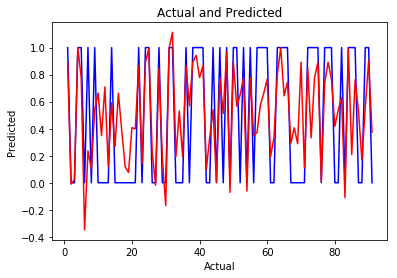

In [73]:
c=[i for i in range(1,92,1)]
plt.plot(c,Y_test,color='blue')
plt.plot(c,y_pred_m6, color='red')
plt.title("Actual and Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0,0.5,'y_test-y_pred')

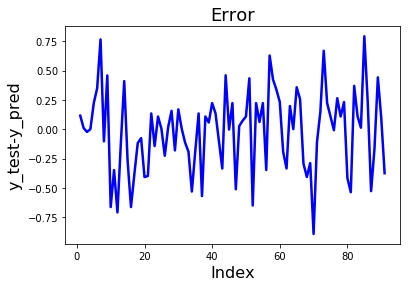

In [74]:
c=[i for i in range(1,92,1)]
plt.plot(c,Y_test-y_pred_m6, color='blue',linewidth=2.5)
plt.title("Error", fontsize=18)
plt.xlabel("Index", fontsize=16)
plt.ylabel("y_test-y_pred", fontsize=16)

In [76]:
from sklearn.metrics import mean_squared_error , r2_score

In [77]:
mse=mean_squared_error(Y_test,y_pred_m6)

In [78]:
r_squared=r2_score(Y_test,y_pred_m6)

In [79]:
print("Mean_Squared_Error", mse)
print("R_squared",r_squared)

Mean_Squared_Error 0.11637368423074246
R_squared 0.5344490439059043


In [366]:
# Prediction

In [365]:
# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier()

In [84]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
predictions = rfc.predict(X_test_m6)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [87]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.76      0.79        46
          1       0.77      0.82      0.80        45

avg / total       0.79      0.79      0.79        91



In [88]:
print(confusion_matrix(Y_test,predictions))

[[35 11]
 [ 8 37]]


In [89]:
print(accuracy_score(Y_test,predictions))

0.7912087912087912


In [364]:
# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=4)
dt_default.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default = dt_default.predict(X_test_m6)
print(classification_report(Y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.90      0.80      0.85        46
          1       0.82      0.91      0.86        45

avg / total       0.86      0.86      0.86        91



In [93]:
print(confusion_matrix(Y_test,y_pred_default))
print(accuracy_score(Y_test,y_pred_default))

[[37  9]
 [ 4 41]]
0.8571428571428571


In [94]:
# log

In [95]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test_m6)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions))

Logistic Regression : 0.8571428571428571


In [96]:
 from sklearn.metrics import classification_report,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)
log_pred=logmodel.predict(X_test_m6)
print(confusion_matrix(Y_test,log_pred))
print(classification_report(Y_test,log_pred))
print(accuracy_score(Y_test,log_pred))

[[37  9]
 [ 4 41]]
             precision    recall  f1-score   support

          0       0.90      0.80      0.85        46
          1       0.82      0.91      0.86        45

avg / total       0.86      0.86      0.86        91

0.8571428571428571


In [363]:
# Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(logmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_logmodel.fit(X,Y)
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


In [98]:
logmodel=LogisticRegression(penalty='l2',C=21.544346900318832)
logmodel.fit(X_train,Y_train)
h_log_pred=logmodel.predict(X_test_m6)
print(confusion_matrix(Y_test,h_log_pred))
print(classification_report(Y_test,h_log_pred))
print(accuracy_score(Y_test,h_log_pred))

[[38  8]
 [ 4 41]]
             precision    recall  f1-score   support

          0       0.90      0.83      0.86        46
          1       0.84      0.91      0.87        45

avg / total       0.87      0.87      0.87        91

0.8681318681318682


In [373]:
# Hyperparameter for random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, random_state =1)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [100]:
predictions = rfc.predict(X_test_m6)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.90      0.78      0.84        46
          1       0.80      0.91      0.85        45

avg / total       0.85      0.85      0.85        91



In [101]:
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))

[[36 10]
 [ 4 41]]
0.8461538461538461


In [374]:
# Hyper para meter for dt
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=1,
                                  min_samples_split=2)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [231]:
clf_gini.score(X_test_m6,Y_test)

0.8571428571428571

In [102]:
#SVM

In [250]:
#from sklearn.svm import SVC
#res = SVC(kernel='linear')
#res.fit(X_train, Y_train)

In [251]:
#y_pred = res.predict(X_test_m6)
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(classification_report(Y_test, y_pred))

In [252]:
#print(confusion_matrix(Y_test,y_pred))
#print(accuracy_score(Y_test,y_pred)) 

In [361]:
# KNN

In [253]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test_m6)
#print('Train accuracy score:',accuracy_score(Y_train,Y_pred))
#print('Test accuracy score:',accuracy_score(Y_test,knn.predict(X_test_m6)))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred)) 

             precision    recall  f1-score   support

          0       0.88      0.80      0.84        46
          1       0.82      0.89      0.85        45

avg / total       0.85      0.85      0.85        91

[[37  9]
 [ 5 40]]
0.8461538461538461


In [360]:
# Prediction by combining 2 algorithm

In [359]:
# DT + Log

In [121]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
estimator=[]
estimator.append(('LR',LogisticRegression()))
estimator.append(('DTC',DecisionTreeClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='soft')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8241758241758241


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [122]:
# DT + RF

In [203]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
estimator=[]
estimator.append(('DTC',DecisionTreeClassifier()))
estimator.append(('RFC',RandomForestClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='soft')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8131868131868132


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
# DT + KNN

In [292]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('DTC',DecisionTreeClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='soft')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8351648351648352


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [133]:
# RF + Log

In [205]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
estimator=[]
estimator.append(('LR',LogisticRegression()))
estimator.append(('RFC',RandomForestClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='soft')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8681318681318682


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [260]:
# RF + KNN

In [353]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('RFC',RandomForestClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='soft')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8901098901098901


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [267]:
# log  + KNN

In [271]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('LR',LogisticRegression()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='soft')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8681318681318682


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [375]:
#Prediction by combining 3 algorithm

In [384]:
# Log + DT + RF

In [383]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
estimator=[]
estimator.append(('LR',LogisticRegression()))
estimator.append(('RFC',RandomForestClassifier()))
estimator.append(('DTC',DecisionTreeClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='hard')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8351648351648352


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
# Log + DT + KNN

In [385]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
estimator=[]
estimator.append(('LR',LogisticRegression()))
estimator.append(('DTC',DecisionTreeClassifier()))
estimator.append(('KNN',KNeighborsClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='hard')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8571428571428571


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [386]:
# Log + RF + KNN

In [387]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
estimator=[]
estimator.append(('LR',LogisticRegression()))
estimator.append(('RFC',RandomForestClassifier()))
estimator.append(('KNN',KNeighborsClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='hard')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8791208791208791


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [388]:
# RF + DT + KNN

In [395]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
estimator=[]
estimator.append(('RFC',RandomForestClassifier()))
estimator.append(('DTC',DecisionTreeClassifier()))
estimator.append(('KNN',KNeighborsClassifier()))
#ensemble=VotingClassifier(estimators=[('Decision Tree',decisiontree),('Random Forest',forest)],voting='soft',weights=[2,1]).fit(X_train,Y_train)
ensemble=VotingClassifier(estimators=estimator,voting='hard')
ensemble.fit(X_train,Y_train)
print(ensemble.score(X_test_m6,Y_test))

0.8571428571428571


C:\Users\Dinesh Dhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
